In [18]:
import pandas as pd
import numpy as np
import glob
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Загружаем датасет

In [119]:
df = pd.read_csv("data_with_features_30.csv")
df["coarse_genre"] = df.coarse_genre.apply(lambda x: x.lower())
df.head()

student coarse_genre         genre1         genre2 genre3  \
0      Шемякина Аня         rock     Blues Rock            NaN    NaN   
1  Людмила_Проценко      classic  neo-classical  new age piano    NaN   
2   Никанорова Даша      classic   Instrumental            NaN    NaN   
3      Паша_Дерябин      electro      Synthwave            NaN    NaN   
4   Darya Khaleneva      new_age      downtempo        ambient    NaN   

                        title  amplitude_envelope  root_mean_square  \
0    7Horse_-_Answer_the_Bell            0.069510          0.871047   
1   A_Simple_Life-Brian_Crain            0.050781          0.234817   
2  Adagio_in_G_Minor-Albinoni            0.077048          0.131447   
3      Age_Atomic-Solar_Bears            0.046596          0.609212   
4            Agnus_Dei-Enigma            0.038225          0.385504   

   zero_crossing_rate  spectral_bandwidth  spectral_centroid  \
0            0.316126         2277.809402        1971.450854   
1            0.085297         1115.090935         877.457314   
2            0.044511         1590.882768        1445.911859   
3            0.229749         1740.572950        1365.380247   
4            0.153035         1708.590315        1176.505367   

   spectral_flatness  
0           0.009720  
1           0.000171  
2           0.001278  
3           0.003198  
4           0.001561

In [120]:
#Оставляем только числовые значения.
df_clust = df.drop(["student", "genre1", "genre2", "genre3", "title", "coarse_genre"], axis = 1)
df_clust.head()

amplitude_envelope  root_mean_square  zero_crossing_rate  \
0            0.069510          0.871047            0.316126   
1            0.050781          0.234817            0.085297   
2            0.077048          0.131447            0.044511   
3            0.046596          0.609212            0.229749   
4            0.038225          0.385504            0.153035   

   spectral_bandwidth  spectral_centroid  spectral_flatness  
0         2277.809402        1971.450854           0.009720  
1         1115.090935         877.457314           0.000171  
2         1590.882768        1445.911859           0.001278  
3         1740.572950        1365.380247           0.003198  
4         1708.590315        1176.505367           0.001561

# PCA

In [121]:
pca = PCA(n_components = 3)
db_pca = pca.fit_transform(df_clust)
pca.explained_variance_ratio_


array([9.53215117e-01, 4.67848083e-02, 7.30207607e-08])

In [122]:
principalDf = pd.DataFrame(data = db_pca
             , columns = ['principal component 1', 'principal component 2','principal component 3' ])
principalDf.head()

principal component 1  principal component 2  principal component 3
0              77.394536              50.853356              -0.272302
1            1636.981911            -290.355669               0.150106
2             899.131368            -218.976593               0.385695
3             880.998648             -49.968631              -0.131663
4            1054.906119              30.360789               0.070477

In [123]:
finalDf = pd.concat([principalDf, df['coarse_genre']], axis = 1)

finalDf.head()

principal component 1  principal component 2  principal component 3  \
0              77.394536              50.853356              -0.272302   
1            1636.981911            -290.355669               0.150106   
2             899.131368            -218.976593               0.385695   
3             880.998648             -49.968631              -0.131663   
4            1054.906119              30.360789               0.070477   

  coarse_genre  
0         rock  
1      classic  
2      classic  
3      electro  
4      new_age

In [124]:
fig = px.scatter(finalDf, x = "principal component 2", y = "principal component 1", color = finalDf['coarse_genre'])
fig.show()

In [88]:
fig = px.scatter_3d(finalDf, x = "principal component 2", y = "principal component 1", z = "principal component 3", color = finalDf['coarse_genre'])
fig.show()

In [125]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)
X_scaled

array([[-0.49918113,  1.1996225 ,  1.13481922, -0.00455612, -0.16947981,
        -0.36494241],
       [-1.10943989, -1.98334231, -1.73608251, -2.99537865, -2.17196885,
        -1.0079621 ],
       [-0.25358024, -2.50048726, -2.24336073, -1.77151494, -1.13144717,
        -0.93343903],
       ...,
       [-1.71136488, -1.59190582, -1.06909201, -0.42274255, -1.52363472,
        -0.9555102 ],
       [ 1.11794774,  0.68397454,  0.47550501,  0.54563684,  1.06374323,
         0.80578601],
       [ 0.81725039,  1.2072872 ,  0.82934602,  0.47635599,  0.63186059,
         0.5816465 ]])

# t-SNE

In [92]:
#Правильный вариант
tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12, n_iter=1000, learning_rate=368, verbose=1)
projections = tsne.fit_transform(X_scaled)

df_subset = df.copy()
df_subset['tsne-2d-one'] = projections[:,0]
df_subset['tsne-2d-two'] = projections[:,1]
fig = px.scatter(
    df_subset, x='tsne-2d-one', y='tsne-2d-two',
    color=finalDf['coarse_genre'],
    title="t-SNE",
    width=600, height=700
)

fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 325 samples in 0.001s...
[t-SNE] Computed neighbors for 325 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 325 / 325
[t-SNE] Mean sigma: 0.671837


C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.725239


C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:347: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:348: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[t-SNE] KL divergence after 1000 iterations: 0.464986


# K-Means

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

array([10,  8,  8, 12,  2,  4,  6,  5,  0, 13,  2, 12,  3,  6, 10, 14,  1,
        4,  4,  6,  0, 11,  5,  6,  6, 11, 10,  4,  3,  6,  5,  6,  6,  3,
        1,  8,  5, 11, 12,  4,  4,  6, 10, 11, 11,  6,  1,  3, 12,  8,  2,
        6, 12,  1, 11, 11, 11, 11,  4,  4,  6,  3, 13,  2, 11,  1,  3,  3,
        4,  2,  1, 11,  5,  5,  5, 14,  3,  2,  2,  3, 13,  3,  1,  1,  2,
       13,  1,  3,  1, 12, 12,  9,  3,  3,  6,  3,  8,  6,  3,  2, 10, 12,
       11,  1, 12,  3,  2,  1,  0,  1,  8,  9, 12,  6, 13,  5,  6,  9,  3,
        3,  2,  5,  6,  0,  4,  5, 13, 10, 11,  2, 13,  1, 14, 11,  5,  4,
       10,  3, 11,  1, 11,  3,  5,  5,  3,  3, 11,  3,  1,  2,  6, 12,  2,
        3,  5, 14,  6,  1, 11,  5, 12,  0, 13,  8,  3,  9, 12,  1,  0,  9,
       12,  9, 11, 13,  4,  5,  5,  3, 12,  4,  2,  6,  3, 12,  1,  4,  4,
        5, 13, 11,  5, 12,  5, 11,  1, 11,  3,  4,  3,  4, 12, 13, 13,  5,
        2, 13,  9,  2,  6,  2,  5,  4,  4, 12, 12,  1,  1, 11,  8,  1,  8,
        1,  9, 11, 12,  9

In [93]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

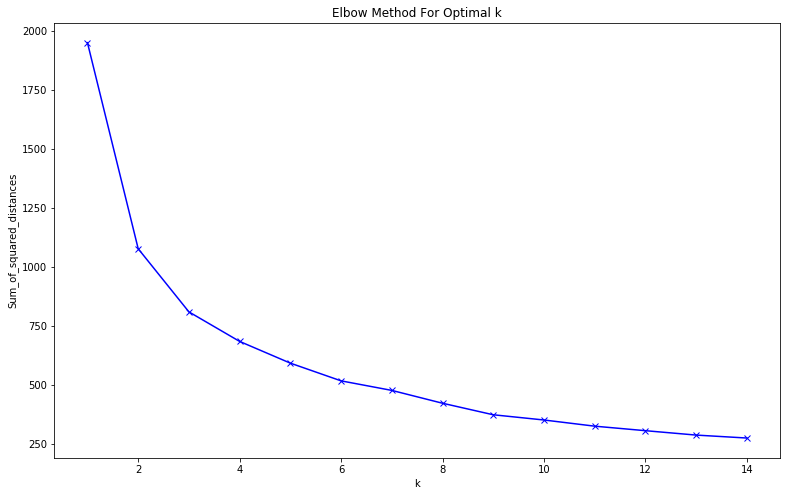

In [94]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [126]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters = 8, n_init = 325)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
df_kmeans = df.copy()
df_kmeans["cluster"] = kmeans.labels_
kmeans.labels_

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:444: DeprecationWarning:

`

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\vanyp\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning:

`n

array([0, 7, 7, 3, 3, 2, 5, 1, 5, 7, 3, 3, 5, 2, 0, 6, 2, 2, 2, 2, 1, 5,
       3, 2, 5, 2, 0, 2, 5, 2, 1, 5, 5, 5, 2, 7, 3, 2, 3, 2, 2, 2, 0, 2,
       2, 5, 2, 5, 3, 7, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 5, 5, 7, 3, 2, 2,
       5, 5, 2, 3, 0, 6, 5, 3, 1, 6, 5, 3, 3, 5, 1, 5, 2, 2, 3, 1, 2, 5,
       0, 3, 3, 0, 5, 5, 5, 5, 7, 5, 5, 3, 0, 3, 2, 2, 3, 5, 7, 2, 1, 2,
       7, 0, 3, 5, 1, 1, 2, 0, 5, 5, 3, 1, 5, 6, 2, 3, 1, 0, 6, 7, 1, 2,
       6, 2, 3, 2, 0, 5, 2, 2, 2, 5, 5, 1, 5, 5, 2, 5, 2, 7, 5, 3, 3, 5,
       1, 6, 5, 2, 2, 5, 3, 6, 1, 7, 0, 0, 3, 2, 1, 0, 3, 0, 2, 1, 2, 5,
       1, 5, 3, 2, 3, 2, 5, 3, 2, 2, 2, 5, 1, 6, 1, 3, 1, 6, 2, 2, 0, 2,
       5, 2, 3, 1, 1, 5, 3, 1, 0, 3, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 7, 2,
       7, 2, 0, 2, 3, 0, 5, 0, 0, 3, 5, 0, 2, 5, 2, 2, 5, 3, 2, 2, 1, 2,
       5, 4, 3, 5, 5, 3, 7, 0, 3, 3, 0, 1, 0, 6, 1, 5, 3, 0, 7, 5, 1, 6,
       0, 7, 0, 5, 2, 1, 7, 5, 5, 1, 1, 6, 1, 5, 0, 1, 1, 5, 7, 3, 2, 5,
       2, 5, 6, 1, 0, 5, 0, 1, 3, 5, 5, 5, 2, 6, 5,

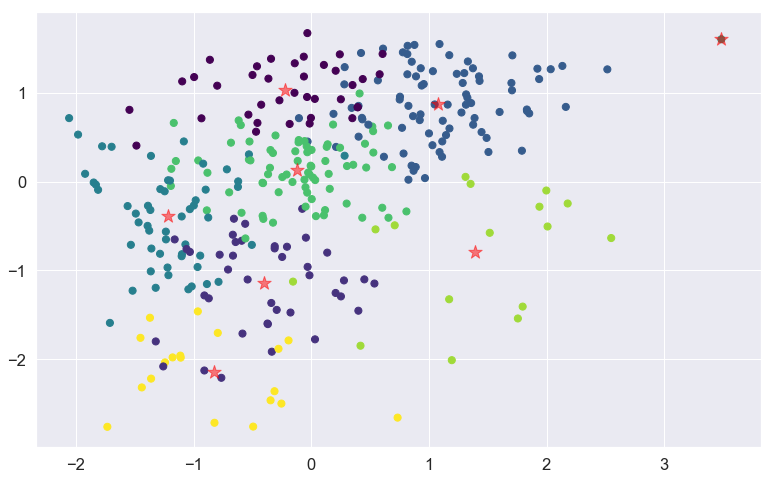

In [127]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker = "*", alpha=0.5, s = 200)

In [128]:
df_kmeans.head()

student coarse_genre         genre1         genre2 genre3  \
0      Шемякина Аня         rock     Blues Rock            NaN    NaN   
1  Людмила_Проценко      classic  neo-classical  new age piano    NaN   
2   Никанорова Даша      classic   Instrumental            NaN    NaN   
3      Паша_Дерябин      electro      Synthwave            NaN    NaN   
4   Darya Khaleneva      new_age      downtempo        ambient    NaN   

                        title  amplitude_envelope  root_mean_square  \
0    7Horse_-_Answer_the_Bell            0.069510          0.871047   
1   A_Simple_Life-Brian_Crain            0.050781          0.234817   
2  Adagio_in_G_Minor-Albinoni            0.077048          0.131447   
3      Age_Atomic-Solar_Bears            0.046596          0.609212   
4            Agnus_Dei-Enigma            0.038225          0.385504   

   zero_crossing_rate  spectral_bandwidth  spectral_centroid  \
0            0.316126         2277.809402        1971.450854   
1            0.085297         1115.090935         877.457314   
2            0.044511         1590.882768        1445.911859   
3            0.229749         1740.572950        1365.380247   
4            0.153035         1708.590315        1176.505367   

   spectral_flatness  cluster  
0           0.009720        0  
1           0.000171        7  
2           0.001278        7  
3           0.003198        3  
4           0.001561        3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

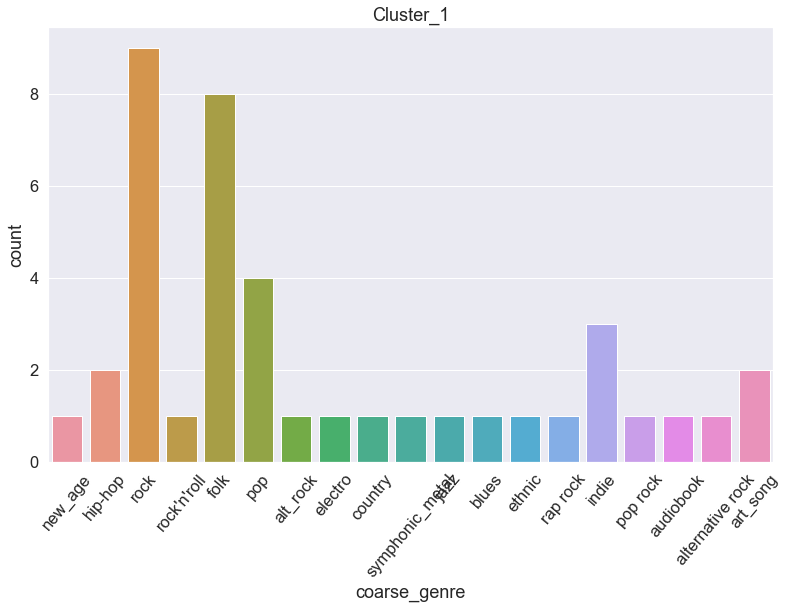

In [129]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "1"')
sns.countplot(x = df_clust1.coarse_genre)

plt.title('Cluster_1')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

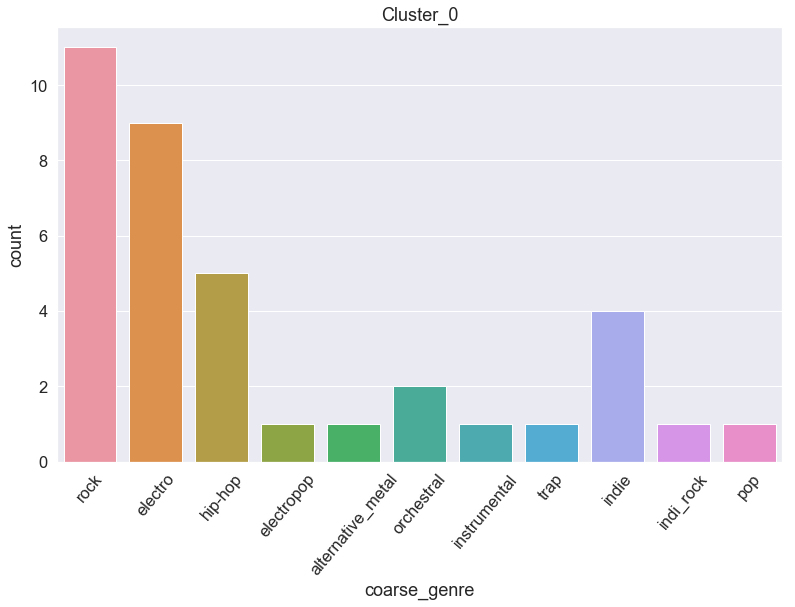

In [130]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "0"')
sns.countplot(x = df_clust1.coarse_genre)

plt.title('Cluster_0')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

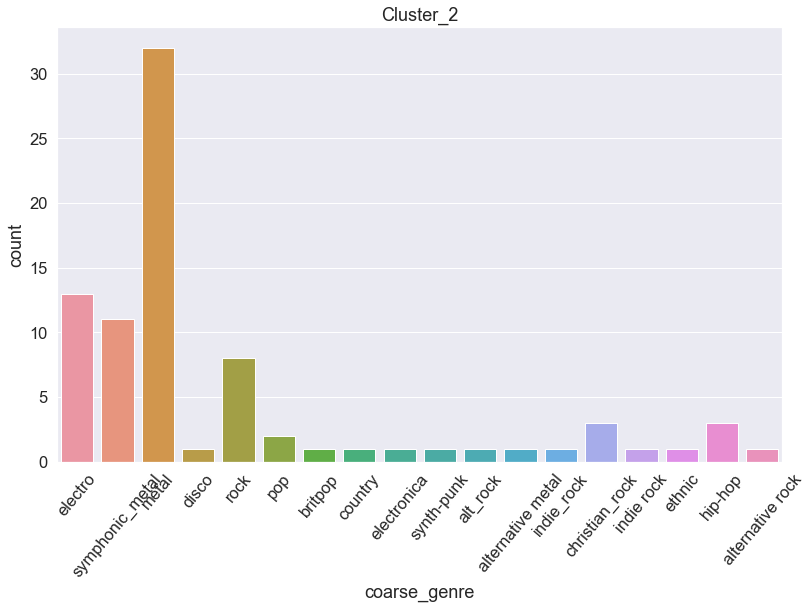

In [131]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "2"')
sns.countplot(x = df_clust1.coarse_genre)

plt.title('Cluster_2')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

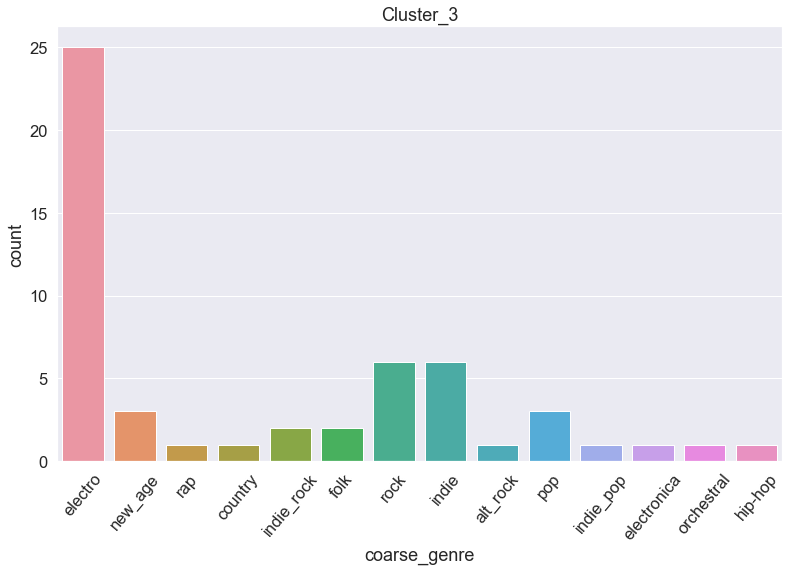

In [132]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "3"')
sns.countplot(x = df_clust1.coarse_genre)

plt.title('Cluster_3')
plt.xticks(rotation=50)

(array([0]), <a list of 1 Text xticklabel objects>)

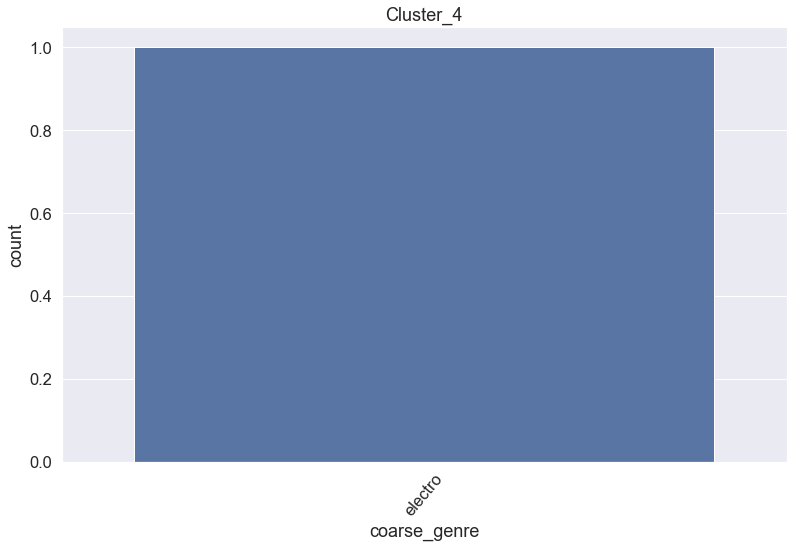

In [133]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "4"')
sns.countplot(x = df_clust1.coarse_genre)

plt.title('Cluster_4')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

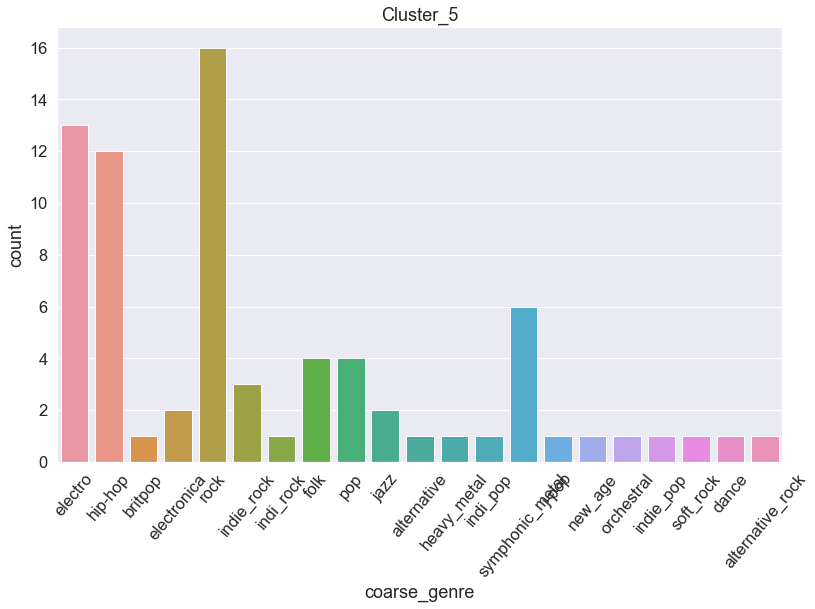

In [134]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "5"')
sns.countplot(x = df_clust1.coarse_genre)

plt.title('Cluster_5')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

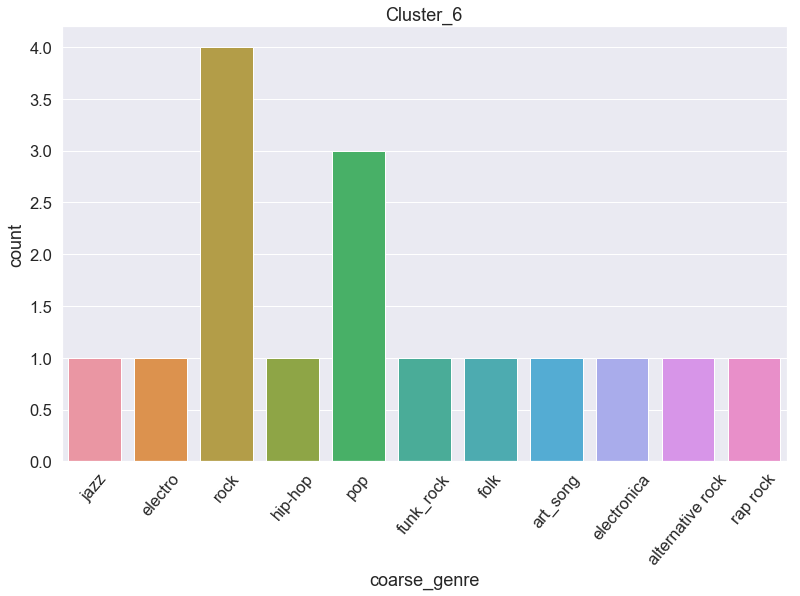

In [135]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "6"')
sns.countplot(x = df_clust1.coarse_genre)
sns.set(font_scale=1.5) 
plt.title('Cluster_6')
plt.xticks(rotation=50)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

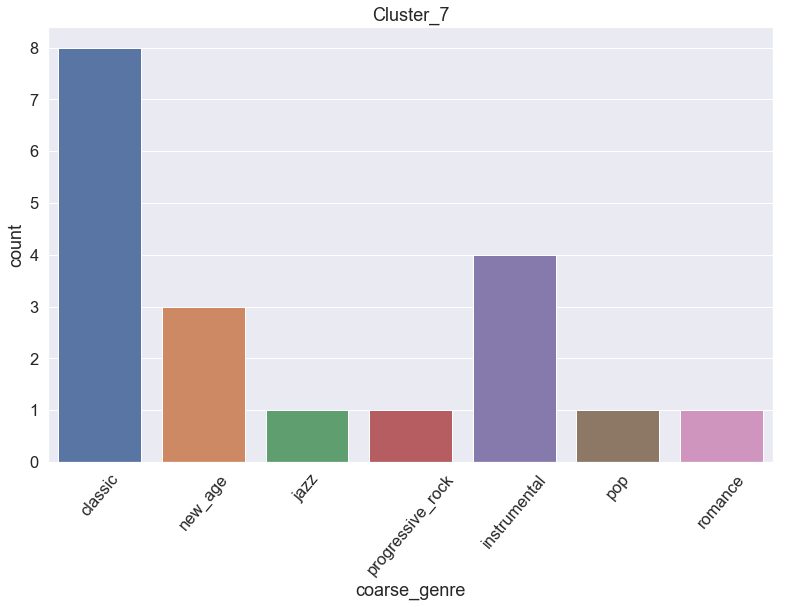

In [136]:
plt.rcParams['figure.figsize']=(13,8)
df_clust1 = df_kmeans.query('cluster == "7"')
sns.countplot(x = df_clust1.coarse_genre)

plt.title('Cluster_7')
plt.xticks(rotation=50)